In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA

currency = pd.read_csv('DEXUSEU.csv')

currency.head()

,DATE,DEXUSEU
0,2015-10-02,1.1276
1,2015-10-05,1.1200
2,2015-10-06,1.1266
3,2015-10-07,1.1249
4,2015-10-08,1.1282


In [2]:
currency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     1306 non-null   object
 1   DEXUSEU  1306 non-null   object
dtypes: object(2)
memory usage: 20.5+ KB


In [3]:
currency['DEXUSEU'] = pd.to_numeric(currency['DEXUSEU'], errors='coerce')
currency.dropna(inplace=True)

In [4]:
currency

,DATE,DEXUSEU
0,2015-10-02,1.1276
1,2015-10-05,1.1200
2,2015-10-06,1.1266
3,2015-10-07,1.1249
4,2015-10-08,1.1282
...,...,...
1301,2020-09-28,1.1660
1302,2020-09-29,1.1717
1303,2020-09-30,1.1723
1304,2020-10-01,1.1752


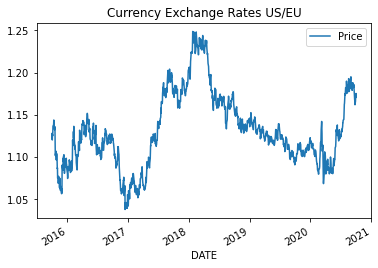

In [5]:
currency.index = pd.to_datetime(currency['DATE'])
currency.plot()
plt.legend(labels=['Price'])
plt.title('Currency Exchange Rates US/EU')
plt.show()

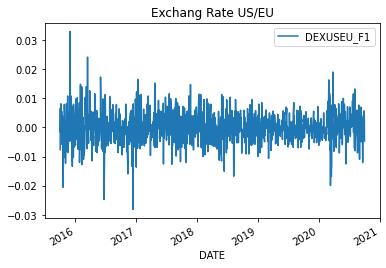

In [6]:
currency['DEXUSEU_F1'] = currency['DEXUSEU'] - currency['DEXUSEU'].shift()
currency.plot(y='DEXUSEU_F1')
plt.title('Exchang Rate US/EU')
plt.show()

Text(0.5, 1.0, 'Exchange Rate Pacf')

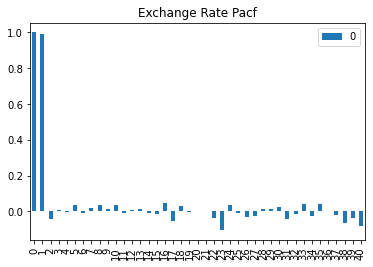

In [7]:
x_acf = pd.DataFrame(pacf(currency.DEXUSEU))
x_acf.plot(kind='bar')

plt.title('Exchange Rate Pacf')

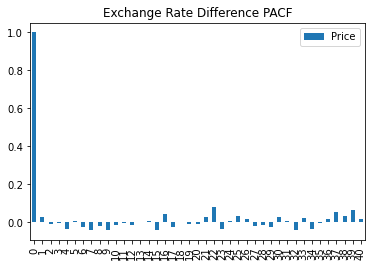

In [8]:
x_acf = pd.DataFrame(pacf(currency.DEXUSEU_F1[1:]))
x_acf.plot(kind='bar')
plt.legend(labels=['Price'])
plt.title('Exchange Rate Difference PACF')
plt.show()

In [9]:
arima_010 = ARIMA(currency.DEXUSEU, order=(0,1,0)).fit()
print(arima_010.summary())
print()
print('Residuals Description {}'.format(arima_010.resid.describe))

                             ARIMA Model Results                              
Dep. Variable:              D.DEXUSEU   No. Observations:                 1250
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4784.877
Method:                           css   S.D. of innovations              0.005
Date:                Mon, 12 Oct 2020   AIC                          -9565.755
Time:                        16:30:28   BIC                          -9555.493
Sample:                             1   HQIC                         -9561.897
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.44e-05      0.000      0.231      0.817      -0.000       0.000

Residuals Description <bound method NDFrame.describe of DATE
2015-10-05   -0.007634
2015-10-06    0.006566
2015-10-07   -0.001734


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'Histogram of Residuals')

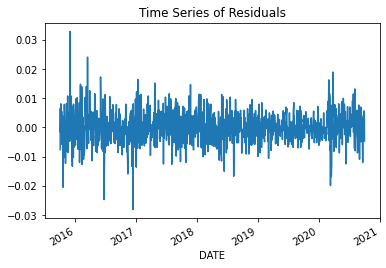

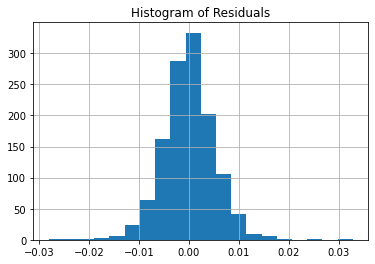

In [10]:
residuals = pd.DataFrame(arima_010.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

In [11]:
arima_111 = ARIMA(currency.DEXUSEU, order=(1,1,1)).fit()
print(arima_111.summary())
print()
print('Residuals Description {}'.format(arima_111.resid.describe))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.DEXUSEU   No. Observations:                 1250
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4785.511
Method:                       css-mle   S.D. of innovations              0.005
Date:                Mon, 12 Oct 2020   AIC                          -9563.023
Time:                        16:30:29   BIC                          -9542.499
Sample:                             1   HQIC                         -9555.307
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.417e-05      0.000      0.226      0.821      -0.000       0.000
ar.L1.D.DEXUSEU    -0.6145      0.401     -1.532      0.126      -1.401       0.172
ma.L1.D.DEXUSEU     0.6397      

Text(0.5, 1.0, 'Histogram of Residuals')

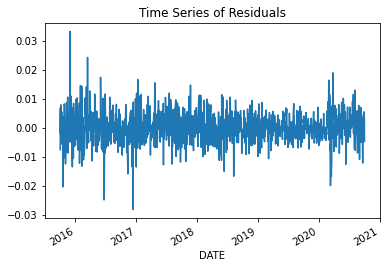

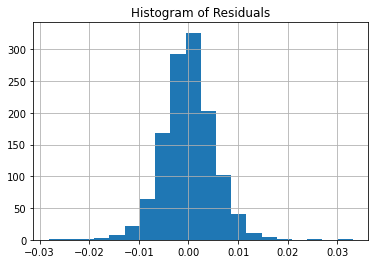

In [12]:
residuals = pd.DataFrame(arima_111.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

In [16]:
arima_222 = ARIMA(currency.DEXUSEU, order=(2,2,2)).fit()
print(arima_222.summary())
print()
print('Residuals Description {}'.format(arima_222.resid.describe))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:             D2.DEXUSEU   No. Observations:                 1249
Model:                 ARIMA(2, 2, 2)   Log Likelihood                4776.220
Method:                       css-mle   S.D. of innovations              0.005
Date:                Mon, 12 Oct 2020   AIC                          -9540.441
Time:                        16:32:02   BIC                          -9509.660
Sample:                             2   HQIC                         -9528.869
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.329e-07   4.19e-07      0.317      0.751   -6.88e-07    9.53e-07
ar.L1.D2.DEXUSEU    -0.9479      0.044    -21.502      0.000      -1.034      -0.861
ar.L2.D2.DEXUSEU     0.0193 

Text(0.5, 1.0, 'Histogram of Residuals')

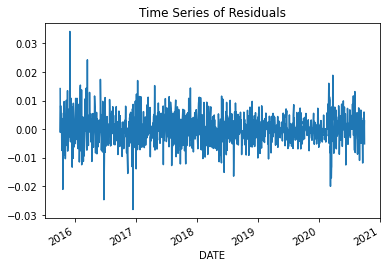

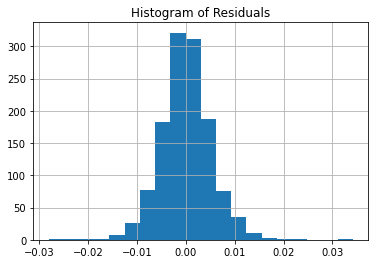

In [17]:
residuals = pd.DataFrame(arima_222.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

#### Summary:

Amongst all the models tried, ARIMA (0,1,0) performed at its best with a BIC of -9555. Though the model performed at its best amongst the 3, it still is a negative number which means that the model still needs significant improvements.

The Log likelyhood with ARIMA (0,1,0) is also the positive number which we can get as close to 0 as possible.

The P values are also significantly higher than 0.05 in which ARIMA (2,2,2) was the model with 2 features of less than a P-Value of 0.05.

